## Load raw waveforms from binary file

In this notebook, we will load raw waveforms  from a binary file and plot them according to channel locations.

TODO: compute amplitudes of waveforms

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import spks.io as sio
from spks.raw import RawRecording

c:\Users\mmelin\anaconda3\envs\spks\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
DATADIR = 'V:/Subjects/MM008/'
PROBE_INDEX = 0
SESSION_INDEX = 0
#spikesorting_folders = sio.list_kilosort_result_paths(DATADIR)[PROBE_INDEX]
KILOSORT_FOLDER = r'V:/Subjects/MM012/2023-08-11/001/spike_sorters/pykilosort/probe00'
#COMPRESSED_BINARY_FILE = r'V:/Subjects/MM012/2023-08-11/001/raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.cbin' 
COMPRESSED_BINARY_FILE = r'X:/test_ephys_session/_spikeglx_ephysData_g0_t0.imec0.ap.bin' #decompressed

### Get the spike times and clusters from putative single units
We will use the Kilosort labels here, but this can also be done after phy curation

In [3]:
raw_recording = RawRecording([COMPRESSED_BINARY_FILE], return_preprocessed=True) #TODO: make this handle .cbin files. Turn on preprocessing?
clusters = sio.load_cluster_data(KILOSORT_FOLDER)
print(clusters.keys())

cluster_labels = clusters['labels'].KSLabel.values
cluster_ids = clusters['labels'].cluster_id.values
good_cluster_ids = cluster_ids[np.where(cluster_labels == 'good')]
#print(good_cluster_ids)

good_spikes = clusters['spks'][np.isin(clusters['clusters'],good_cluster_ids)] 
good_clusters = clusters['clusters'][np.isin(clusters['clusters'],good_cluster_ids)]  

assert good_spikes.shape == good_clusters.shape

Using kilosort data (either there is no phy curation, or the user has specified that kilosort data should be used).
dict_keys(['spks', 'clusters', 'labels'])


### Extract all waveforms from the binary

In [4]:
CLUSTER_ID = 111
good_spikes = good_spikes[good_clusters == CLUSTER_ID] # only get spikes from one cluster
print(f'We will extract {len(good_spikes)} spikes for this cluster')

We will extract 34074 spikes for this cluster


In [5]:
import spks.max_waveforms as spwaves

SCRATCH_DIR = 'C:/Data/churchland' # fast disk to write memmap file
nchannels = raw_recording.shape[1]

waves = spwaves.extract_memmapped_waveforms(COMPRESSED_BINARY_FILE, SCRATCH_DIR, nchannels, good_spikes)
waves.shape # (nspikes, nsamples, nchannels)


Waveforms mapped to C:\Data\churchland\NxeiSiNihZTcMKvVkZgF.bin
Extracting waveforms with chunk-size 1000


100%|██████████| 35/35 [00:01<00:00, 19.67it/s]


(34074, 60, 385)

(383, 2)


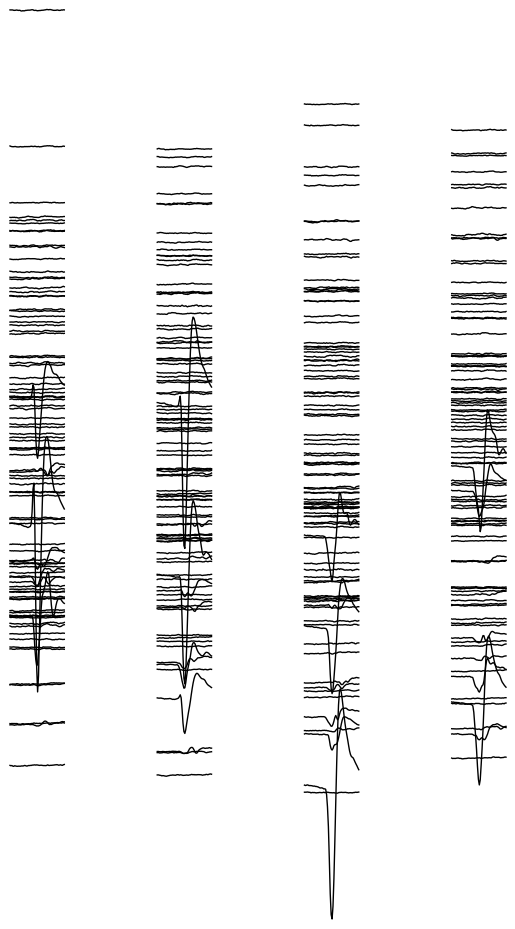

In [6]:
from spks.viz import plot_footprints

channel_xy = raw_recording.metadata[0]['coords']
channel_idx = raw_recording.metadata[0]['channel_idx']
print(channel_xy.shape)
plot_footprints(np.mean(waves[:,:,channel_idx], axis=0), channel_xy)
plt.show()

#del waves #deletes the temporary bin file